In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Basics of deep learning and neural networks


### Coding the forward propagation algorithm

In [6]:
input_data = np.array([3, 5])
weights = {'node_1': np.array([ 4, -5]), 'output': np.array([2, 7]), 'node_0': np.array([2, 4])}

In [7]:
# Calculate node 0 value: node_0_value
node_0_value = (input_data * weights['node_0']).sum()

# Calculate node 1 value: node_1_value
node_1_value = (input_data * weights['node_1']).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (hidden_layer_outputs * weights['output']).sum()

# Print output
print(output)

-39


### The Rectified Linear Activation Function

In [8]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(input, 0)
    
    # Return the value just calculated
    return(output)

# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

52


### Applying the network to many observations/rows of data

In [18]:
input_data = [np.array([3, 5]), np.array([ 1, -1]), np.array([0, 0]), np.array([8, 4])]
weights = {'node_1': np.array([ 4, -5]), 'output': np.array([2, 7]), 'node_0': np.array([2, 4])}

In [19]:
# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input )

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input )

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)

# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row, weights))

# Print results
print(results)

[52, 63, 0, 148]


### Coding how weight changes affect accuracy

In [20]:
# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [-1, 1]
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)
print(error_1)

6
0


### Multi-layer neural networks

In [12]:
input_data = np.array([3, 5])
weights = {'output': np.array([2, 7]), 'node_1_0': np.array([-1,  2]), 'node_0_0': np.array([2, 4]), 'node_1_1': np.array([1, 2]), 'node_0_1': np.array([ 4, -5])}


In [13]:
def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model output: model_output
    model_output = (hidden_1_outputs * weights['output']).sum()
    
    # Return model_output
    return(model_output)

output = predict_with_network(input_data)
print(output)

182


## Optimizing a neural network with backward propagation

### Scaling up to multiple data points


In [21]:
target_actuals = [1, 3, 5, 7]
input_data = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]
weights_0 = {'node_1': np.array([1, 2]), 'output': np.array([1, 1]), 'node_0': np.array([2, 1])}
weights_1 = {'node_1': np.array([1. , 1.5]), 'output': np.array([1. , 1.5]), 'node_0': np.array([2, 1])}

In [22]:
from sklearn.metrics import mean_squared_error

# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row, weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals, model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)

Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


### Calculating slopes

In [29]:
weights = np.array([0, 2, 1])
input_data = np.array([1, 2, 3])
target = 0

In [30]:
# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = target - preds

# Calculate the slope: slope
slope = input_data * error * 2

# Print the slope
print(slope)

[-14 -28 -42]


### Improving model weights

In [31]:
# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights - learning_rate * slope

# Get updated predictions: preds_updated
preds_updated = (weights_updated * input_data).sum()

# Calculate updated error: error_updated
error_updated =  preds_updated - target

# Print the original error
print(error)

# Print the updated error
print(error_updated)

7
5.04


### Making multiple updates to weights

In [61]:
weights = np.array([0, 2, 1])
input_data = np.array([1, 2, 3])
target = 0

In [60]:
# Define predict_with_network()
def predict_with_network(input_data, weights):
    
    # Return model output
    return(relu((input_data * weights).sum()))

def get_slope(input_data, target, weights):
    
    # Calculate the predictions: preds
    preds = (weights * input_data).sum()

    # Calculate the error: error
    error = target - preds

    # Calculate the slope: slope
    slope = input_data * error * 2
    
    return slope

def get_mse(input_data, target, weights):
        
    # Append prediction to model_output_1
    model_output = predict_with_network(input_data, weights)

    # Calculate the mean squared error for model_output
    mse = model_output - target
    
    return mse   

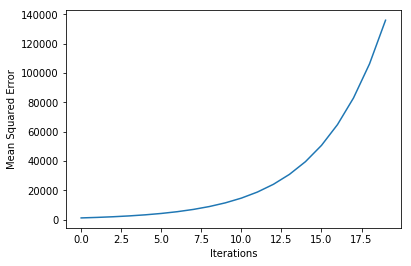

In [64]:
n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - 0.01 * slope
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

## Building deep learning models with keras


### Specifying a model

In [66]:
df = pd.read_csv('hourly_wages.csv')
predictors = df.iloc[:, 1:].values
target = df.iloc[:, 0].values
df.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


In [68]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(50, activation='relu', input_shape=(n_cols, )))

# Add the second layer
model.add(Dense(32, activation = 'relu'))

# Add the output layer
model.add(Dense(1))

Using TensorFlow backend.


### Compiling the model

In [69]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

Loss function: mean_squared_error


### Fitting the model

In [70]:
# Fit the model
model.fit(predictors, target)

Epoch 1/1
534/534 [==============================] - 0s 194us/step - loss: 134.0509


### Last steps in classification models

In [76]:
df = pd.read_csv('titanic_all_numeric.csv')
predictors = df.iloc[:, 1:].values[:600]
pred_data = df.iloc[:, 1:].values[600:]
target = df.iloc[:, 0].values[:600]
df.shape

(891, 11)

In [79]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
# import tensorflow as tf 

# Convert the target to categorical: target
target = to_categorical(df.survived)

# Set up the model
model = Sequential()

# model.add(Activation(tf.nn.softmax))

# Add the first layer
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))

# Add the output layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model
model.fit(predictors, target)


TypeError: softmax() got an unexpected keyword argument 'axis'

### Making predictions

In [ ]:
# Calculate predictions: predictions
predictions = model.predict(pred_data)

# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:, 1]

# print predicted_prob_true
print(predicted_prob_true)

## Fine-tuning keras models